Original Rating Matrix (with missing values as 0):
[[5. 3. 0. 1.]
 [4. 0. 0. 1.]
 [1. 1. 0. 5.]
 [1. 0. 0. 4.]
 [0. 1. 5. 4.]]

User Feature Matrix (U):
[[-0.43689593 -0.66924125 -0.29627751  0.48637475]
 [-0.29717498 -0.44308727 -0.05015708 -0.79591123]
 [-0.51589728  0.13631518  0.54893193  0.28612203]
 [-0.39999635  0.11077382  0.48349385 -0.20569271]
 [-0.54282768  0.5700326  -0.61205501 -0.0760895 ]]

Singular Values (Σ):
[9.03171974 6.22925557 3.77397038 1.83890217]

Item Feature Matrix (Vt):
[[-0.47488998 -0.26234348 -0.3005118  -0.78444124]
 [-0.78203025 -0.20891356  0.45754472  0.36801718]
 [-0.17212379 -0.25224247 -0.81089006  0.49920382]
 [-0.36507752  0.907692   -0.20688838 -0.00329281]]

Approximated Rating Matrix (Rank-2):
[[ 5.13  1.91 -0.72  1.56]
 [ 3.43  1.28 -0.46  1.09]
 [ 1.55  1.04  1.79  3.97]
 [ 1.18  0.8   1.4   3.09]
 [-0.45  0.54  3.1   5.15]]


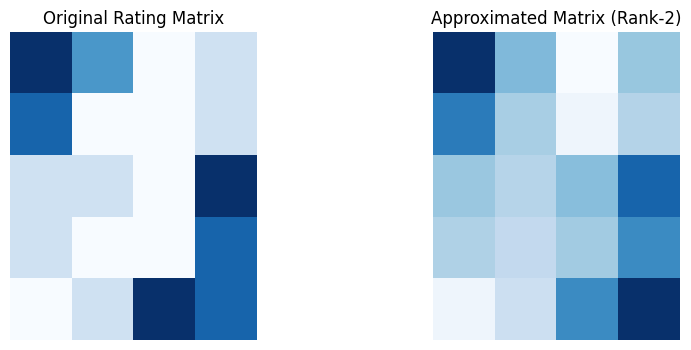

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample user-item rating matrix (0 = unrated)
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
], dtype=float)

print("Original Rating Matrix (with missing values as 0):")
print(R)

# Perform SVD
U, sigma, Vt = np.linalg.svd(R, full_matrices=False)

print("\nUser Feature Matrix (U):")
print(U)

print("\nSingular Values (Σ):")
print(sigma)

print("\nItem Feature Matrix (Vt):")
print(Vt)

# Choose reduced rank k
k = 2
sigma_k = np.diag(sigma[:k])

# Compute approximated rating matrix
R_approx = np.dot(U[:, :k], np.dot(sigma_k, Vt[:k, :]))

print(f"\nApproximated Rating Matrix (Rank-{k}):")
print(np.round(R_approx, 2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(R, cmap="Blues")
axes[0].set_title("Original Rating Matrix")
axes[0].axis("off")

axes[1].imshow(R_approx, cmap="Blues")
axes[1].set_title(f"Approximated Matrix (Rank-{k})")
axes[1].axis("off")

plt.show()
